# ***KYC & AML data analysis***

**Problem Statement**

*Financial institutions are required to maintain accurate customer data and monitor transactions to comply with KYC and AML regulations. In large customer bases, identifying high-risk customers, understanding transaction behavior, and monitoring geographic and channel-based risks can be challenging.
This project aims to analyze customer KYC data and transaction records to identify high-risk customers, assess transaction patterns across risk ratings, and highlight areas that require enhanced monitoring. The insights from this analysis help support risk-based decision-making, improve compliance effectiveness, and strengthen overall financial crime prevention.*

In [83]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
sns.set_style("whitegrid")

In [85]:
# File paths
kyc_file = 'mock_customers.csv'
transactions_file = 'mock_transactions.csv'

In [86]:
# Load data
kyc_df = pd.read_csv(kyc_file)
transactions_df = pd.read_csv(transactions_file)

In [87]:
# Preview
print("KYC Data:")
display(kyc_df.head())
print("Transactions Data:")
display(transactions_df.head())

KYC Data:


,customerid,country,pepflag,sanctionsflag,kyctier,onboardingdate,lastreviewdate
0,C0001,BE,0,0,High,2021-08-02,2025-12-22
1,C0002,NG,0,0,High,2018-08-17,2024-03-12
2,C0003,GB,0,0,High,2018-02-21,2024-02-16
3,C0004,IN,0,0,Low,2022-02-27,2025-11-08
4,C0005,NL,0,0,Low,2019-07-18,2024-08-21


Transactions Data:


,txid,customerid,txdatetime,amount,currency,customercountry,counterpartycountry,isinternational,channel,txtype,customerpepflag,customerkyctier,customersanctionsflag
0,T000001,C0044,2024-03-06 12:24:00,1728.20,EUR,LU,NL,1,Online,CardPayment,0,Low,0
1,T000002,C0058,2025-09-02 14:33:00,6795.14,EUR,CY,DE,1,Branch,CashDeposit,0,Low,0
2,T000003,C0053,2024-09-14 17:55:00,2073.67,EUR,LU,BE,1,Branch,WireIn,0,Medium,0
3,T000004,C0023,2024-01-12 21:46:00,2165.40,EUR,US,NL,1,Online,CashDeposit,0,Low,0
4,T000005,C0077,2024-04-27 21:56:00,1168.72,EUR,GB,BE,1,Branch,CardPayment,0,Low,0


In [88]:
# Basic checks
print("KYC missing values:\n", kyc_df.isnull().sum())
print("Transactions missing values:\n", transactions_df.isnull().sum())
print("KYC duplicates:", kyc_df.duplicated().sum())
print("Transactions duplicates:", transactions_df.duplicated().sum())

KYC missing values:
 customerid        0
country           0
pepflag           0
sanctionsflag     0
kyctier           0
onboardingdate    0
lastreviewdate    0
dtype: int64
Transactions missing values:
 txid                     0
customerid               0
txdatetime               0
amount                   0
currency                 0
customercountry          0
counterpartycountry      0
isinternational          0
channel                  0
txtype                   0
customerpepflag          0
customerkyctier          0
customersanctionsflag    0
dtype: int64
KYC duplicates: 0
Transactions duplicates: 0


In [89]:
# Check for duplicates
print("KYC duplicates:", kyc_df.duplicated().sum())
print("Transactions duplicates:", transactions_df.duplicated().sum())

KYC duplicates: 0
Transactions duplicates: 0


In [90]:
print(kyc_df.columns.tolist())

['customerid', 'country', 'pepflag', 'sanctionsflag', 'kyctier', 'onboardingdate', 'lastreviewdate']


In [91]:
print(transactions_df.columns.tolist())

['txid', 'customerid', 'txdatetime', 'amount', 'currency', 'customercountry', 'counterpartycountry', 'isinternational', 'channel', 'txtype', 'customerpepflag', 'customerkyctier', 'customersanctionsflag']


In [92]:
# Standardize date columns
kyc_df['onboardingdate'] = pd.to_datetime(kyc_df['onboardingdate'])
kyc_df['lastreviewdate'] = pd.to_datetime(kyc_df['lastreviewdate'])
transactions_df['txdatetime'] = pd.to_datetime(transactions_df['txdatetime'])

In [93]:
# Check data types
print(kyc_df.dtypes)
print(transactions_df.dtypes)

customerid                object
country                   object
pepflag                    int64
sanctionsflag              int64
kyctier                   object
onboardingdate    datetime64[ns]
lastreviewdate    datetime64[ns]
dtype: object
txid                             object
customerid                       object
txdatetime               datetime64[ns]
amount                          float64
currency                         object
customercountry                  object
counterpartycountry              object
isinternational                   int64
channel                          object
txtype                           object
customerpepflag                   int64
customerkyctier                  object
customersanctionsflag             int64
dtype: object


In [94]:
# Merge KYC and transaction data
merged_df = pd.merge(transactions_df, kyc_df, on="customerid", how="left")
print("KYC shape:", kyc_df.shape)
print("Transactions shape:", transactions_df.shape)
print("Merged shape:", merged_df.shape)
print("Missing KYC rows after merge:", merged_df["country"].isna().sum())

merged_df.head()

KYC shape: (80, 7)
Transactions shape: (600, 13)
Merged shape: (600, 19)
Missing KYC rows after merge: 0


,txid,customerid,txdatetime,amount,currency,customercountry,counterpartycountry,isinternational,channel,txtype,customerpepflag,customerkyctier,customersanctionsflag,country,pepflag,sanctionsflag,kyctier,onboardingdate,lastreviewdate
0,T000001,C0044,2024-03-06 12:24:00,1728.20,EUR,LU,NL,1,Online,CardPayment,0,Low,0,LU,0,0,Low,2020-05-15,2025-02-14
1,T000002,C0058,2025-09-02 14:33:00,6795.14,EUR,CY,DE,1,Branch,CashDeposit,0,Low,0,CY,0,0,Low,2019-12-06,2024-05-22
2,T000003,C0053,2024-09-14 17:55:00,2073.67,EUR,LU,BE,1,Branch,WireIn,0,Medium,0,LU,0,0,Medium,2018-07-09,2025-02-09
3,T000004,C0023,2024-01-12 21:46:00,2165.40,EUR,US,NL,1,Online,CashDeposit,0,Low,0,US,0,0,Low,2020-10-31,2025-10-25
4,T000005,C0077,2024-04-27 21:56:00,1168.72,EUR,GB,BE,1,Branch,CardPayment,0,Low,0,GB,0,0,Low,2022-10-31,2024-06-12


In [95]:
# Basic statistics on amounts
merged_df["txdatetime"] = pd.to_datetime(merged_df["txdatetime"])

amount_desc = merged_df["amount"].describe()
print(amount_desc)

# Amount by KYC tier
kyc_tier_stats = merged_df.groupby("kyctier")["amount"].agg(["count", "mean", "sum"])
print("\nAmount by KYC tier:")
print(kyc_tier_stats)

count      600.000000
mean      3461.723917
std       3655.823531
min        350.910000
25%        911.392500
50%       2093.480000
75%       4229.355000
max      13395.580000
Name: amount, dtype: float64

Amount by KYC tier:
         count         mean         sum
kyctier                                
High        83  3175.209639   263542.40
Low        341  3703.698974  1262961.35
Medium     176  3128.014773   550530.60


## **Percentage of Customers Overdue for KYC**

*To identify customers whose KYC (Know Your Customer) review is overdue.  
In banking, KYC reviews are usually required annually. Customers not reviewed in more than 12 months are flagged as overdue.*

In [96]:
merged_df['days_since_last_review'] = (pd.Timestamp.today() - merged_df['lastreviewdate']).dt.days
merged_df['kyc_overdue'] = np.where(merged_df['days_since_last_review'] > 365, 1, 0)
merged_df.head()

,txid,customerid,txdatetime,amount,currency,customercountry,counterpartycountry,isinternational,channel,txtype,...,customerkyctier,customersanctionsflag,country,pepflag,sanctionsflag,kyctier,onboardingdate,lastreviewdate,days_since_last_review,kyc_overdue
0,T000001,C0044,2024-03-06 12:24:00,1728.20,EUR,LU,NL,1,Online,CardPayment,...,Low,0,LU,0,0,Low,2020-05-15,2025-02-14,319,0
1,T000002,C0058,2025-09-02 14:33:00,6795.14,EUR,CY,DE,1,Branch,CashDeposit,...,Low,0,CY,0,0,Low,2019-12-06,2024-05-22,587,1
2,T000003,C0053,2024-09-14 17:55:00,2073.67,EUR,LU,BE,1,Branch,WireIn,...,Medium,0,LU,0,0,Medium,2018-07-09,2025-02-09,324,0
3,T000004,C0023,2024-01-12 21:46:00,2165.40,EUR,US,NL,1,Online,CashDeposit,...,Low,0,US,0,0,Low,2020-10-31,2025-10-25,66,0
4,T000005,C0077,2024-04-27 21:56:00,1168.72,EUR,GB,BE,1,Branch,CardPayment,...,Low,0,GB,0,0,Low,2022-10-31,2024-06-12,566,1


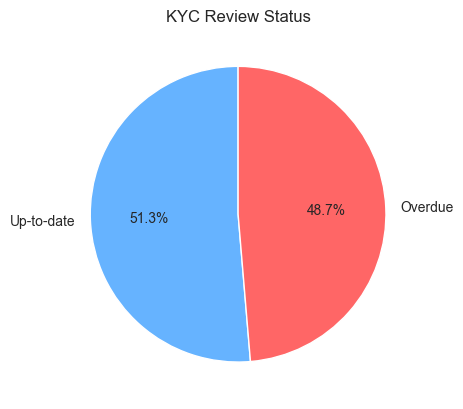

In [97]:
merged_df['kyc_overdue'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',              # Show percentage on chart
    labels=['Up-to-date', 'Overdue'], # Custom labels for 0 and 1
    colors=['#66b3ff','#ff6666'],   # Colors: blue = up-to-date, red = overdue
    startangle=90
)

plt.title('KYC Review Status')  # Chart title
plt.ylabel('')                  # Remove y-axis label for cleaner look
plt.show()

#od=merged_df['kyc_overdue'].value_counts()
#plt.pie(od,autopct='%1.1f%%',labels=['Up-to-date', 'Overdue'],)

*This analysis was done to understand how many customers have not completed their KYC review on time. In banking, keeping customer information up to date is very important to meet regulatory requirements and reduce risk. By identifying customers whose KYC is overdue, the bank can focus on reviewing these accounts first, improve compliance, and avoid potential regulatory issues. This analysis helps the operations team work more efficiently and supports better risk management.*

## **Number of Customers in Each KYC Tier (Low / Medium / High)**

*Banks classify customers into different KYC tiers based on their risk level.Understanding how many customers fall into Low, Medium, and High KYC tiers helps the bank:

Understand its overall risk exposure

Allocate monitoring efforts efficiently

Focus more attention on higher-risk customers

This analysis gives a clear picture of the customer risk distribution.*

In [98]:
# Count number of customers in each KYC tier
kyc_tier_counts = merged_df['kyctier'].value_counts().reset_index()

kyc_tier_counts

,kyctier,count
0,Low,341
1,Medium,176
2,High,83


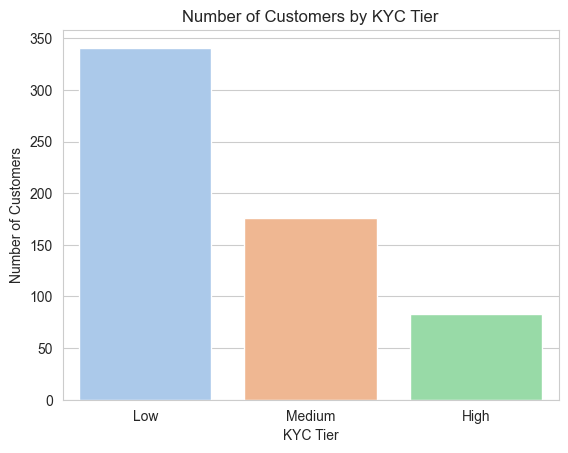

In [99]:
sns.barplot(data=kyc_tier_counts,x="kyctier",y="count",palette="pastel",hue="kyctier")
plt.title('Number of Customers by KYC Tier')
plt.xlabel('KYC Tier')
plt.ylabel('Number of Customers')
plt.show()

*Most customers fall under the Low KYC tier, which indicates a lower overall risk profile.
However, a smaller number of customers are classified as High risk, and these customers require enhanced monitoring and more frequent reviews.
This distribution helps the bank prioritize resources and maintain strong compliance controls.*

## **Customers by Country**

This analysis helps the bank understand where its customers are located geographically.
Customer location is very important in KYC and AML because some countries carry higher regulatory or financial crime risk. By analyzing customers by country, the bank can identify countries with higher customer concentration and support country-based risk monitoring and compliance planning

In [100]:
# Count number of customers in each country
customers_by_country = merged_df['country'].value_counts().reset_index()
customers_by_country.columns=["country","customers"]
customers_by_country

,country,customers
0,AE,86
1,IN,80
2,NL,75
3,US,70
4,GB,66
5,NG,50
6,BE,45
7,CY,35
8,IE,31
9,LU,30


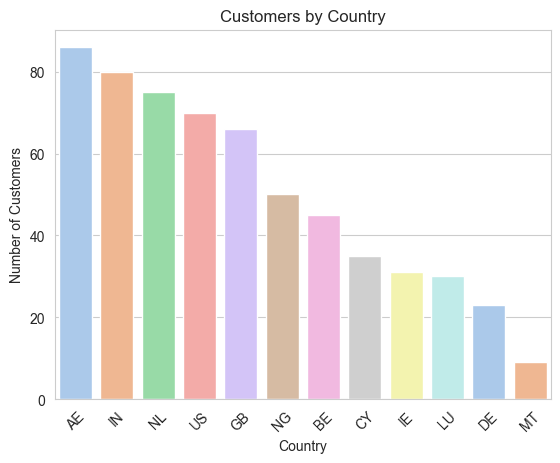

In [101]:
sns.barplot(data=customers_by_country,x="country",y="customers",palette="pastel",hue="country")
plt.title('Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

*I have analyzed the number of customers in each country to understand the bank’s geographic distribution. The results show that most customers are in AE, IN, and NL, with fewer in countries like MT and DE. This helps the bank see where customer concentration is high and focus compliance and monitoring efforts accordingly, especially in countries with higher regulatory or financial crime risk.*

## **PEP Clients by Customer Country**

PEP (Politically Exposed Person) clients are considered higher risk because they may be more vulnerable to bribery, corruption, or financial crime.
Analyzing PEP clients by country helps the bank:

Identify where high-risk clients are concentrated

Focus monitoring and compliance efforts on specific countries

Ensure regulatory and AML requirements are met

In [102]:
# Filter customers who are PEP
pep_customers = merged_df[merged_df['pepflag'] == 1]

# Count number of PEP customers in each country
pep_by_country = pep_customers['country'].value_counts().reset_index()
pep_by_country.columns=["Country","Customers"]
pep_by_country

,Country,Customers
0,BE,20
1,GB,12
2,AE,7
3,IN,4
4,DE,3


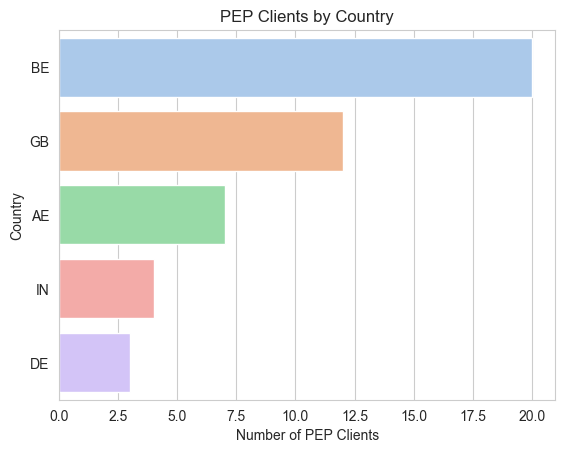

In [103]:
sns.barplot(
    data=pep_by_country,
    x='Customers',
    y='Country',
    palette="pastel",hue="Country"
)

plt.title('PEP Clients by Country')
plt.xlabel('Number of PEP Clients')
plt.ylabel('Country')
#plt.xticks(rotation=45)
plt.show()

*I have analyzed PEP clients by country to understand where high-risk customers are concentrated. From the results, most PEP clients are in Belgium and Great Britain, while fewer are in AE, IN, and DE. This helps the bank focus compliance and monitoring efforts on countries with more high-risk clients and manage regulatory risk more effectively.*

## **International vs Domestic Transactions**

Understanding whether transactions are domestic or international is important for:

AML and regulatory monitoring (international transactions can carry higher risk)

Identifying trends in customer behavior

Helping the bank focus on monitoring high-risk international transactions

In [104]:
# Count number of domestic and international transactions
transaction_counts = merged_df['isinternational'].value_counts()

# Display the counts
transaction_counts

isinternational
1    551
0     49
Name: count, dtype: int64

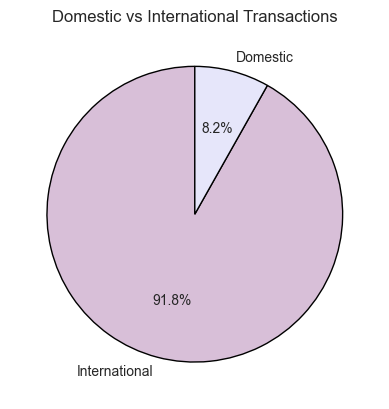

In [105]:
transaction_counts.plot(
    kind='pie',
    labels=['International','Domestic', ],
    autopct='%1.1f%%',
    colors=['#D8BFD8','#E6E6FA'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Domestic vs International Transactions')
plt.ylabel('')
plt.show()

*Most transactions are international, while domestic transactions are fewer.This indicates that the bank handles mostly international payments, which may require enhanced monitoring to manage compliance and AML risks.*

## **Transaction Amount by KYC Tier**

Analyzing transaction amounts by KYC tier helps the bank:

Understand the risk exposure associated with different customer tiers

Identify if high-risk customers (High KYC tier) are making unusually large transactions

Support compliance and AML monitoring

In [106]:
# Group by KYC tier and sum transaction amounts
tx_by_kyc = merged_df.groupby('customerkyctier')['amount'].sum().reset_index()
tx_by_kyc

,customerkyctier,amount
0,High,263542.40
1,Low,1262961.35
2,Medium,550530.60


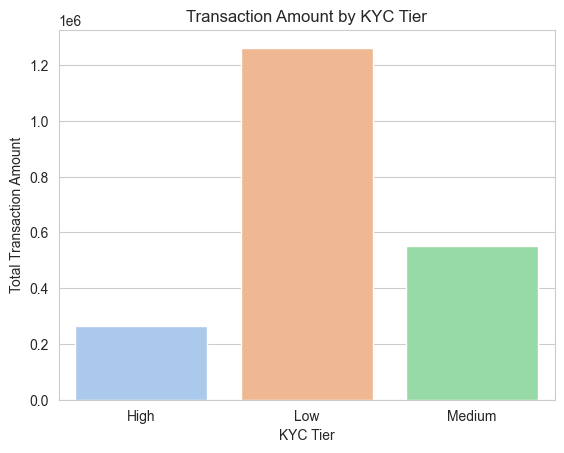

In [107]:
sns.barplot(data=tx_by_kyc,x="customerkyctier",y="amount",palette="pastel",hue="customerkyctier")
plt.title('Transaction Amount by KYC Tier')
plt.xlabel('KYC Tier')
plt.ylabel('Total Transaction Amount')
plt.show()

*The results show that Low KYC tier customers contribute the highest transaction volume, followed by Medium and High tiers. Although High KYC tier customers have lower total transaction amounts, they require closer monitoring due to higher risk levels. This analysis helps prioritize compliance efforts based on transaction behavior and customer risk classification.*

## **High-Risk Countries vs Customer Count**

*Some countries are considered high-risk due to higher AML, fraud, or regulatory concerns.
This analysis checks how many customers belong to high-risk countries, which helps compliance teams focus monitoring efforts.*

In [108]:
#This is assumed for project purpose
high_risk_countries = ['NG', 'CY', 'MT']

# Filter customers belonging to high-risk countries
high_risk_customers = merged_df[merged_df['country'].isin(high_risk_countries)]
high_risk_customers.head()

,txid,customerid,txdatetime,amount,currency,customercountry,counterpartycountry,isinternational,channel,txtype,...,customerkyctier,customersanctionsflag,country,pepflag,sanctionsflag,kyctier,onboardingdate,lastreviewdate,days_since_last_review,kyc_overdue
1,T000002,C0058,2025-09-02 14:33:00,6795.14,EUR,CY,DE,1,Branch,CashDeposit,...,Low,0,CY,0,0,Low,2019-12-06,2024-05-22,587,1
8,T000009,C0034,2025-04-09 00:46:00,358.59,EUR,NG,NG,0,Branch,CashWithdrawal,...,High,0,NG,0,0,High,2020-07-08,2025-10-17,74,0
12,T000013,C0002,2025-10-16 16:38:00,1848.48,EUR,NG,US,1,Online,CardPayment,...,High,0,NG,0,0,High,2018-08-17,2024-03-12,658,1
22,T000023,C0014,2024-05-08 04:42:00,2458.33,EUR,CY,GB,1,Online,CashDeposit,...,Low,0,CY,0,0,Low,2021-01-21,2025-01-08,356,0
23,T000024,C0035,2025-05-01 17:10:00,5879.51,EUR,NG,DE,1,Online,WireOut,...,Low,0,NG,0,0,Low,2021-04-21,2025-12-05,25,0


In [109]:
# Count number of customers in each high-risk country
high_risk_country_counts = high_risk_customers['country'].value_counts().reset_index()

# Display the result
high_risk_country_counts.columns=["Country","Customers"]
high_risk_country_counts

,Country,Customers
0,NG,50
1,CY,35
2,MT,9


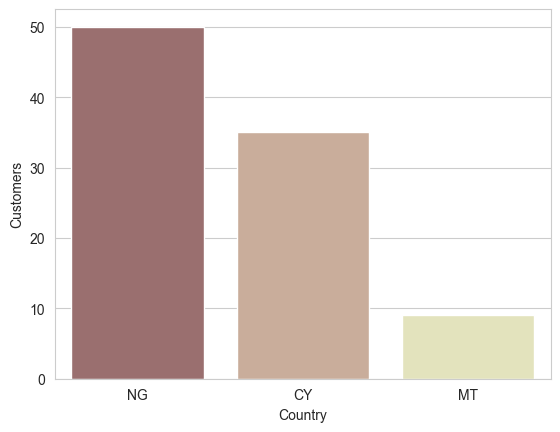

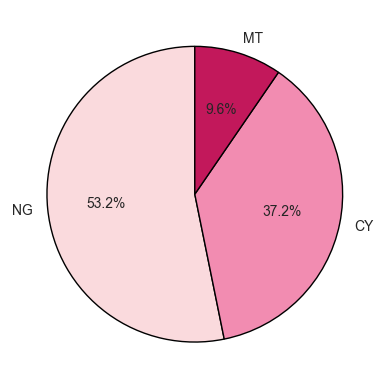

In [110]:
# Bar plot
sns.barplot(
    data=high_risk_country_counts,
    x='Country',
    y='Customers',
    palette='pink',hue="Country"
)
plt.show()

#pie plot
plt.pie(
    high_risk_country_counts["Customers"],
    labels=high_risk_country_counts["Country"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FADADD', '#F28CB1', '#C2185B'],
    wedgeprops={'edgecolor': 'black'}
)
plt.show()


*This analysis was done to understand how many customers come from countries that carry higher compliance and AML risk. The results show that Nigeria has the highest number of customers among high-risk countries, followed by Cyprus and Malta. Even though some countries have fewer customers, they still need close monitoring. This helps the bank focus attention and resources on customers from regions that may require stricter checks.*

In [111]:
# Create a new column 'riskrating' with default value 'Low'
merged_df['riskrating'] = 'Low'

# Assign 'High' risk
merged_df.loc[
    (merged_df['pepflag'] == 1) |
    (merged_df['kyctier'] == 'High') |
    (merged_df['sanctionsflag'] == 1),
    'riskrating'
] = 'High'

# Assign 'Medium' risk
merged_df.loc[
    (merged_df['riskrating'] != 'High') &
    (merged_df['kyctier'] == 'Medium'),
    'riskrating'
] = 'Medium'

# Check distribution
merged_df['riskrating'].value_counts()

riskrating
Low       313
Medium    158
High      129
Name: count, dtype: int64

*Risk rating was derived using customer KYC tier, PEP status, and sanctions indicators. Customers with PEP status, high KYC tier, or sanctions exposure were classified as high risk, medium KYC tier customers as medium risk, and remaining customers as low risk. This provides a practical risk classification for further AML analysis.*

## **Identify High-Risk Customers**

*High-risk customers are those who require enhanced monitoring for AML, KYC, and regulatory compliance. Identifying them helps the bank prioritize resources and reduce financial crime risk.*

In [112]:
# Identify High-Risk customers based on PEP, High KYC tier, or Sanctions
merged_df['high_risk_customers'] = (merged_df['pepflag'] == 1) | (merged_df['kyctier'] == 'High') | (merged_df['sanctionsflag'] == 1)

#Count high-risk customers
merged_df['high_risk_customers'].value_counts().reset_index()

,high_risk_customers,count
0,False,471
1,True,129


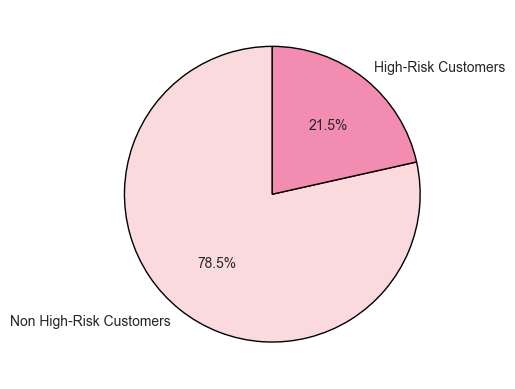

In [113]:
c=merged_df['high_risk_customers'].value_counts().reset_index()
plt.pie(c['count'],labels=['Non High-Risk Customers','High-Risk Customers'],autopct='%1.1f%%',startangle=90,colors=['#FADADD', '#F28CB1'],wedgeprops={'edgecolor': 'black'})
plt.show()

*High-risk customers were identified based on PEP status, High KYC tier, or sanctions flag. In this dataset, 129 customers were classified as high risk, while the majority (471 customers) are low or medium risk. Identifying high-risk customers helps the bank prioritize AML monitoring and allocate compliance resources effectively.*

## **Distribution of Transaction Types by Risk Rating**

*Different transaction types may carry different AML risks. Combining transaction type with customer risk rating helps identify patterns, such as whether high-risk customers are doing certain types of transactions more often. Supports compliance monitoring and risk-based prioritization.*

In [114]:
merged_df.head()

,txid,customerid,txdatetime,amount,currency,customercountry,counterpartycountry,isinternational,channel,txtype,...,country,pepflag,sanctionsflag,kyctier,onboardingdate,lastreviewdate,days_since_last_review,kyc_overdue,riskrating,high_risk_customers
0,T000001,C0044,2024-03-06 12:24:00,1728.20,EUR,LU,NL,1,Online,CardPayment,...,LU,0,0,Low,2020-05-15,2025-02-14,319,0,Low,False
1,T000002,C0058,2025-09-02 14:33:00,6795.14,EUR,CY,DE,1,Branch,CashDeposit,...,CY,0,0,Low,2019-12-06,2024-05-22,587,1,Low,False
2,T000003,C0053,2024-09-14 17:55:00,2073.67,EUR,LU,BE,1,Branch,WireIn,...,LU,0,0,Medium,2018-07-09,2025-02-09,324,0,Medium,False
3,T000004,C0023,2024-01-12 21:46:00,2165.40,EUR,US,NL,1,Online,CashDeposit,...,US,0,0,Low,2020-10-31,2025-10-25,66,0,Low,False
4,T000005,C0077,2024-04-27 21:56:00,1168.72,EUR,GB,BE,1,Branch,CardPayment,...,GB,0,0,Low,2022-10-31,2024-06-12,566,1,Low,False


In [115]:
# Group by transaction type and risk rating, then count
tx_type_risk = merged_df.groupby(['txtype', 'riskrating'])['txid'].count().reset_index()

# Rename columns for clarity
tx_type_risk.columns = ['TransactionType', 'RiskRating', 'Count']

tx_type_risk

,TransactionType,RiskRating,Count
0,CardPayment,High,42
1,CardPayment,Low,138
2,CardPayment,Medium,57
3,CashDeposit,High,23
4,CashDeposit,Low,61
5,CashDeposit,Medium,32
6,CashWithdrawal,High,22
7,CashWithdrawal,Low,56
8,CashWithdrawal,Medium,31
9,WireIn,High,27


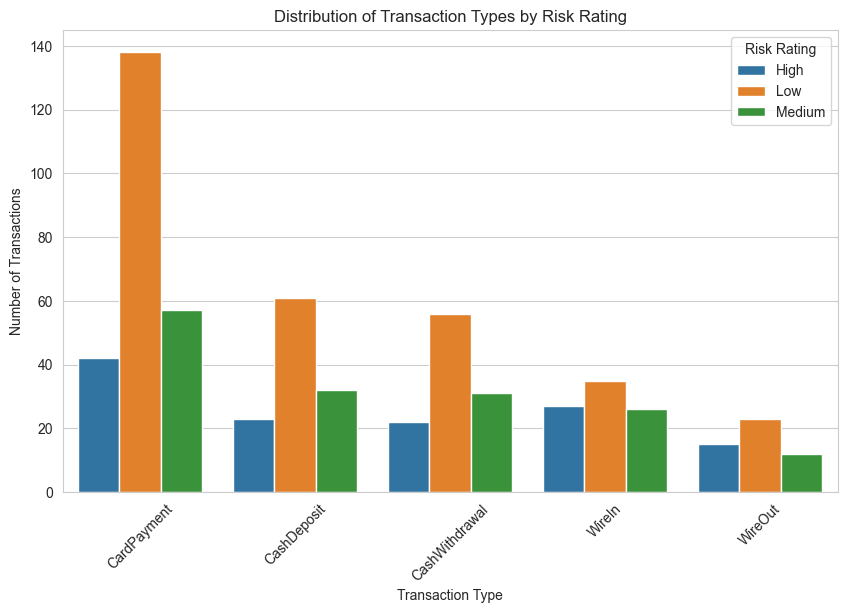

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=tx_type_risk,
    x='TransactionType',
    y='Count',
    hue='RiskRating'
)

plt.title('Distribution of Transaction Types by Risk Rating')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Risk Rating')
plt.show()

*Transaction types were analyzed against customer risk ratings to understand patterns in transaction behavior. The results show that low-risk customers perform the highest number of transactions across all types, which is expected since they are the majority. High-risk customers also perform a significant number of transactions, especially card payments and wire transfers, which may require enhanced monitoring. This analysis helps the bank focus AML checks on higher-risk transaction types and customer segments.*

## **Distribution of Transaction Channels by Risk Rating**

*Different transaction channels (ATM, Branch, Online) carry different levels of risk. Combining channel with customer risk rating helps identify patterns, such as whether high-risk customers use certain channels more frequently.*

In [117]:
# Group by channel and risk rating, then count transactions
channel_risk = merged_df.groupby(['channel', 'riskrating'])['txid'].count().reset_index()

# Rename columns for clarity
channel_risk.columns = ['Channel', 'RiskRating', 'Count']

channel_risk

,Channel,RiskRating,Count
0,ATM,High,34
1,ATM,Low,59
2,ATM,Medium,24
3,Branch,High,46
4,Branch,Low,132
5,Branch,Medium,71
6,Online,High,49
7,Online,Low,122
8,Online,Medium,63


In [118]:
merged_df['channel'].value_counts().reset_index()

,channel,count
0,Branch,249
1,Online,234
2,ATM,117


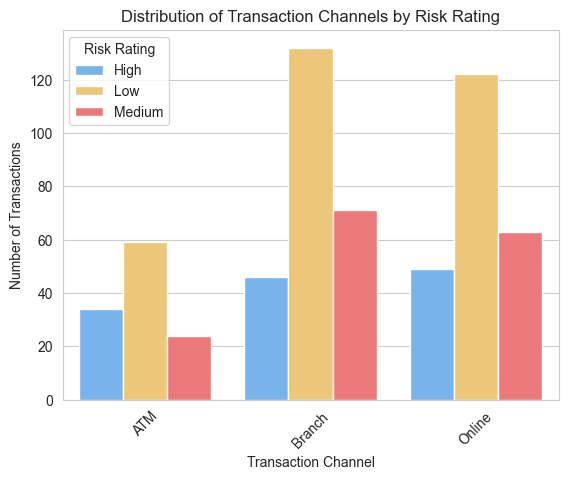

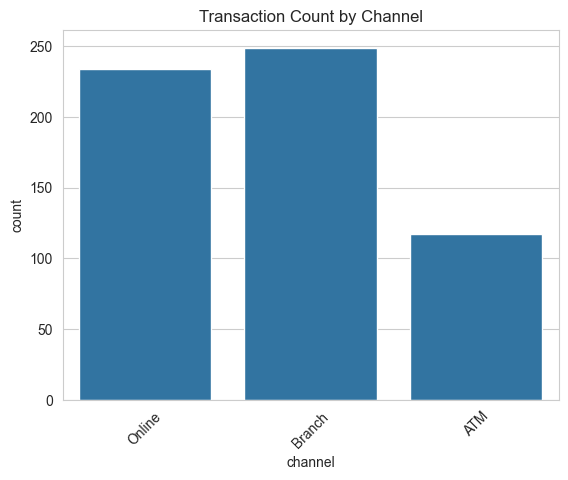

In [119]:
# Bar plot: Transaction Channels by Risk Rating
sns.barplot(data=channel_risk,x='Channel',y='Count',hue='RiskRating',palette=['#66b3ff','#ffcc66','#ff6666'])

plt.title('Distribution of Transaction Channels by Risk Rating')
plt.xlabel('Transaction Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Risk Rating')
plt.show()

sns.countplot(data=merged_df, x="channel")
plt.title("Transaction Count by Channel")
plt.xticks(rotation=45)
plt.show()

*Transaction channels were analyzed to understand how customers with different risk ratings interact with the bank. The results show that low-risk customers dominate across all channels, especially branch and online transactions. However, high-risk customers also show notable activity, particularly in online and branch channels. This insight helps the bank focus monitoring efforts on specific channels where higher-risk customers are more active.*

## **International vs Domestic transactions by Risk Rating**


*International transactions often carry higher AML and regulatory risk than domestic transactions. Combining transaction type (domestic/international) with customer risk rating helps the bank prioritize monitoring of high-risk activities.*

In [120]:
# Group transactions by isinternational and riskrating, then count
indo_risk = merged_df.groupby(['isinternational', 'riskrating'])['txid'].count().reset_index()

# Rename columns for clarity
indo_risk.columns = ['IsInternational', 'RiskRating', 'Count']

indo_risk

,IsInternational,RiskRating,Count
0,0,High,15
1,0,Low,21
2,0,Medium,13
3,1,High,114
4,1,Low,292
5,1,Medium,145


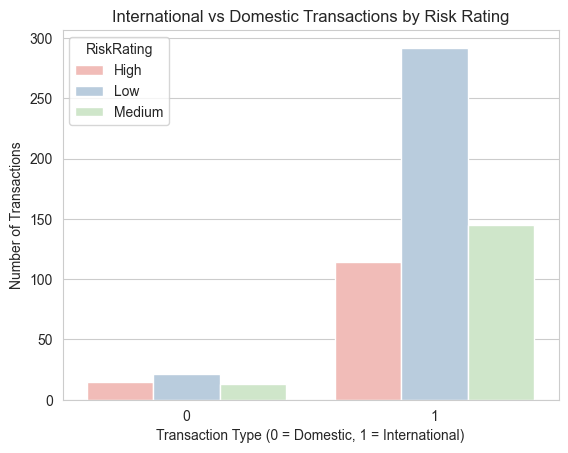

In [121]:
#plt.figure(figsize=(8,6))

# Bar plot: Domestic (0) vs International (1) transactions by Risk Rating
sns.barplot(
    data=indo_risk,
    x='IsInternational',
    y='Count',
    hue='RiskRating',palette='Pastel1'
)

plt.title('International vs Domestic Transactions by Risk Rating')
plt.xlabel('Transaction Type (0 = Domestic, 1 = International)')
plt.ylabel('Number of Transactions')
plt.show()

*Transactions were analyzed to compare domestic and international activity by customer risk rating. The results show that most transactions are international, with Low-risk customers performing the largest number, followed by Medium and High-risk customers. High-risk customers also perform a significant number of international transactions, which may require closer monitoring. Domestic transactions are fewer overall. This analysis helps the bank focus compliance and AML monitoring on higher-risk international transactions.*

## Conclusion

##### **Key Findings**
- A portion of customers were identified with **overdue KYC reviews**, highlighting the need for regular KYC updates.
- **High-risk customers** were successfully identified using KYC tier, PEP status, and sanctions indicators.
- Transaction behavior varied significantly across **risk ratings**, transaction channels, and international activity.
- Certain **countries and channels** showed higher exposure to risk, requiring closer monitoring.
##### **Main Results**
- The analysis provided a **clear classification of customers into Low, Medium, and High risk categories**.
- High-risk customers were more active in **international transactions and online/branch channels**.
- Low-risk customers accounted for the majority of transaction volume, supporting normal business activity.
- Visualizations made it easier to identify **patterns and compliance focus areas**.
##### **What to Do Next**
- Review **overdue KYC** for high-risk accounts first
- Apply **enhanced monitoring** for high-risk customers and international transactions.
- Use these insights to support **risk-based AML controls** and resource allocation.
- Expand the analysis with **real-time monitoring and automated risk scoring**.
